In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv(r"../input/arima-1/train.csv")
df_test = pd.read_csv(r"../input/arima-1/test.csv")

In [3]:
df_train.isnull().sum()
df_train.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

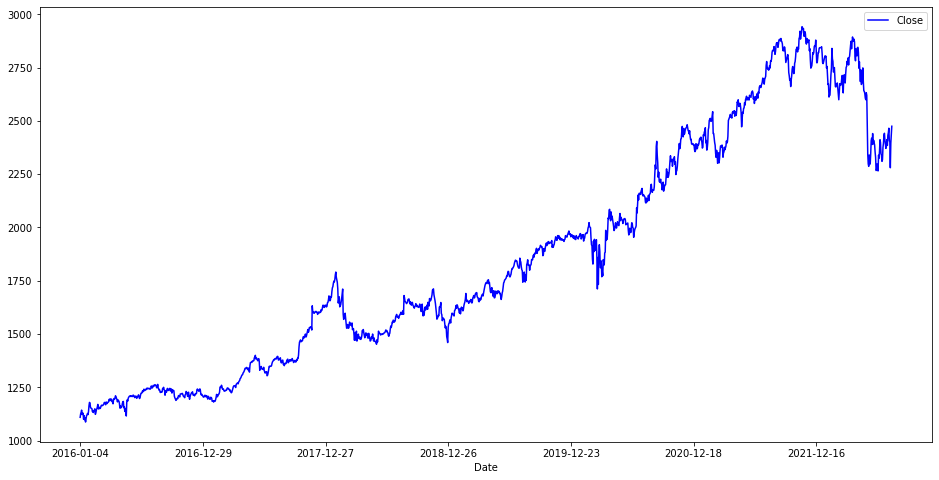

In [4]:
plt.figure(figsize=(16,8))
df_train.plot(kind='line',x='Date',y='Close', color='blue', ax=plt.gca())
plt.show()

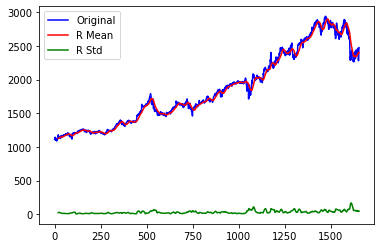

In [5]:
#stationarity
r_mean = df_train['Close'].rolling(20).mean()
r_std = df_train['Close'].rolling(20).std()

orginal = plt.plot(df_train['Close'], color = 'blue', label = 'Original')
mean = plt.plot(r_mean, color = 'red', label = 'R Mean')
std = plt.plot(r_std, color = 'green', label = 'R Std')
plt.legend (loc = 'best')

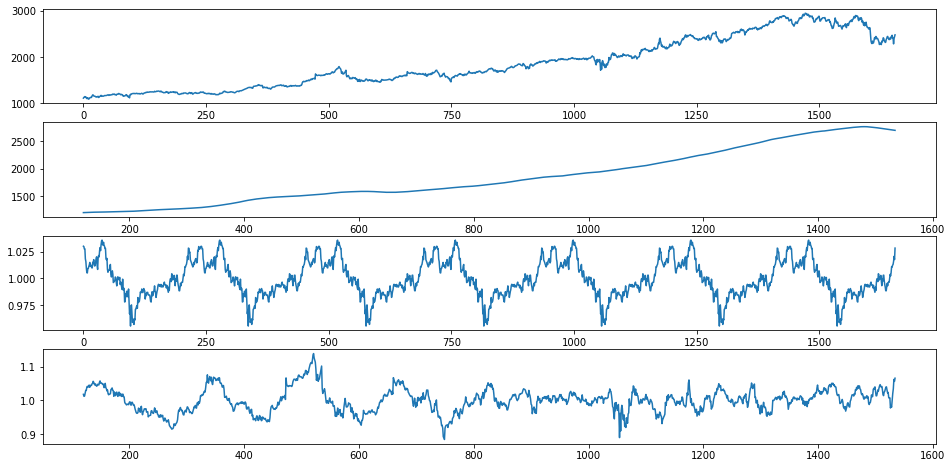

In [6]:
#verify the non-stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
D = seasonal_decompose(df_train['Close'],period = 20*12, model = 'multiplicative')

t = D.trend
s = D.seasonal
r = D.resid

plt.figure(figsize=(16,8))
plt.subplot(411)
plt.plot(df_train['Close'], label = 'Orginal')
plt.subplot(412)
plt.plot(t, label = 'Trend ')
plt.subplot(413)
plt.plot(s, label = 'Seasonal')
plt.subplot(414)
plt.plot(r, label = 'Residual')

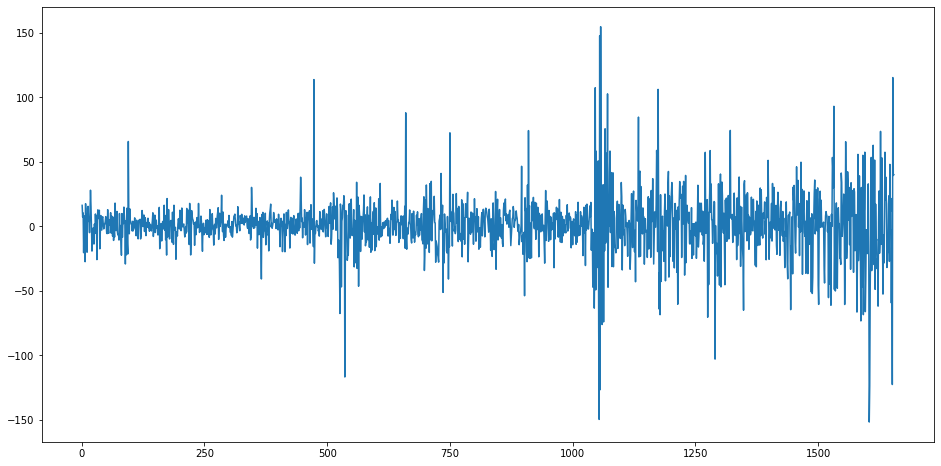

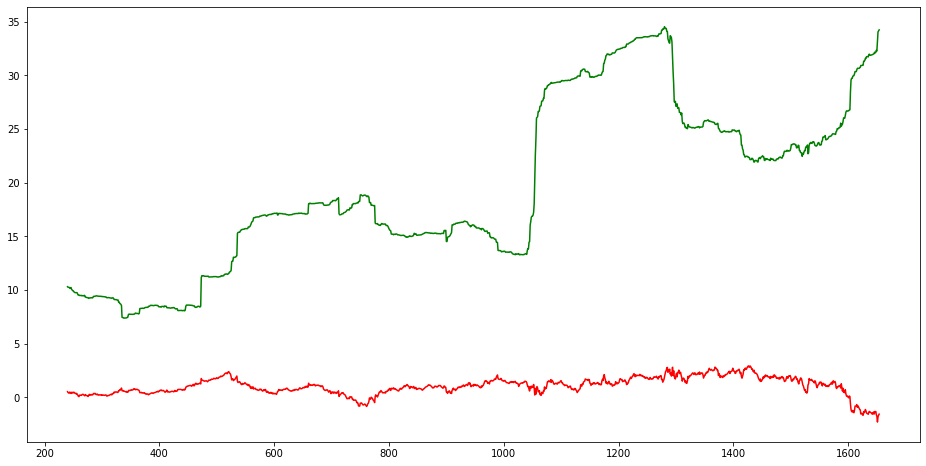

In [7]:
df_train_diff = df_train['Close'] - df_train['Close'].shift(1)
df_train_diff.dropna(inplace=True)

plt.figure(figsize=(16,8))
plt.plot(df_train_diff)

r_mean_diff = df_train_diff.rolling(20*12).mean()
r_std_diff = df_train_diff.rolling(20*12).std()

plt.figure(figsize=(16,8))
plt.plot(r_mean_diff,color = 'red')
plt.plot(r_std_diff,color = 'green')

In [8]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
adfuller(df_train_diff,autolag = 'AIC')


(-13.875890537591106,
 6.339772340240153e-26,
 8,
 1645,
 {'1%': -3.434331479397839,
  '5%': -2.863298594928142,
  '10%': -2.567706235622361},
 14718.460886203047)

In [9]:
lag_acf = acf(df_train_diff,nlags = 20)
lag_pacf = pacf(df_train_diff, nlags = 20)

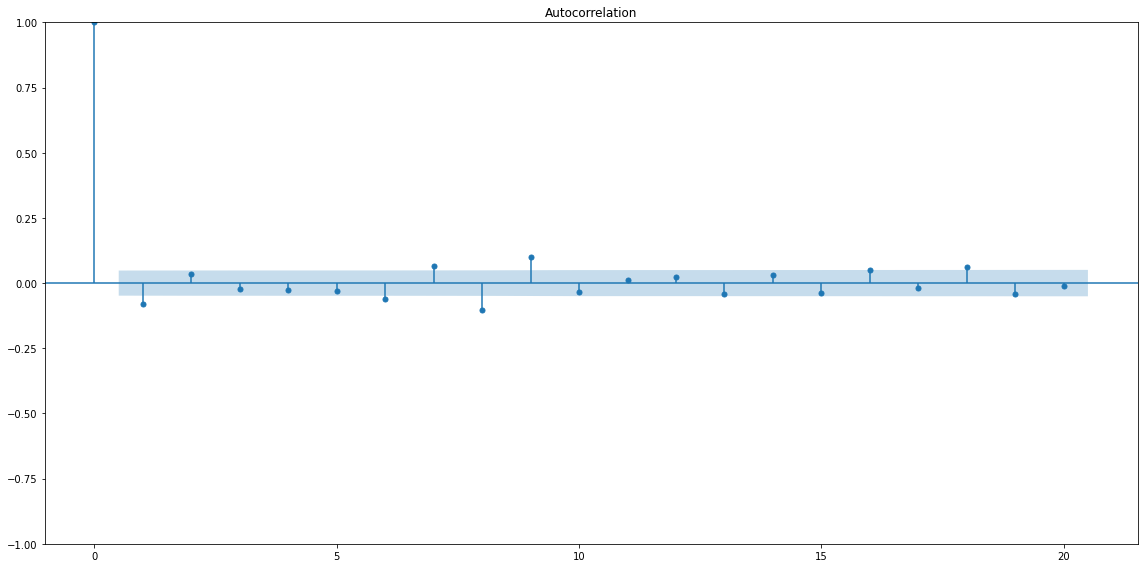

In [10]:
import statsmodels.api as sm
plt.figure(figsize=(16,8))
sm.graphics.tsa.plot_acf(df_train_diff, lags = 20,ax=plt.gca())
plt.tight_layout()

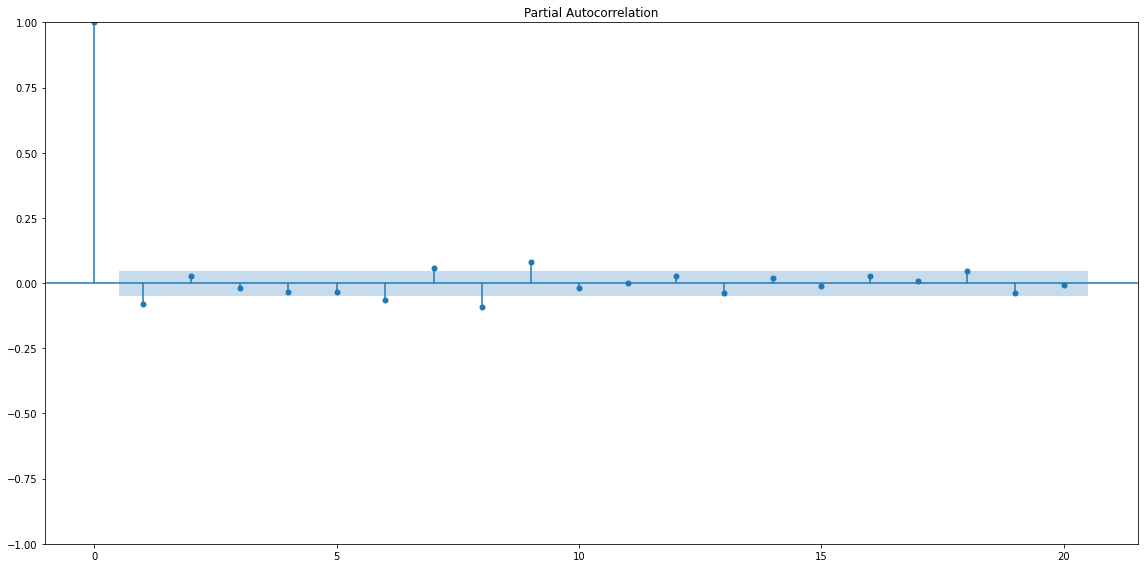

In [11]:
plt.figure(figsize=(16,8))
sm.graphics.tsa.plot_pacf(df_train_diff, method = 'ywm', lags = 20,ax=plt.gca())
plt.tight_layout()

In [12]:
from statsmodels.tsa.arima.model import ARIMA
m =  ARIMA(df_train_diff, order = (1,1,0) ).fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:>

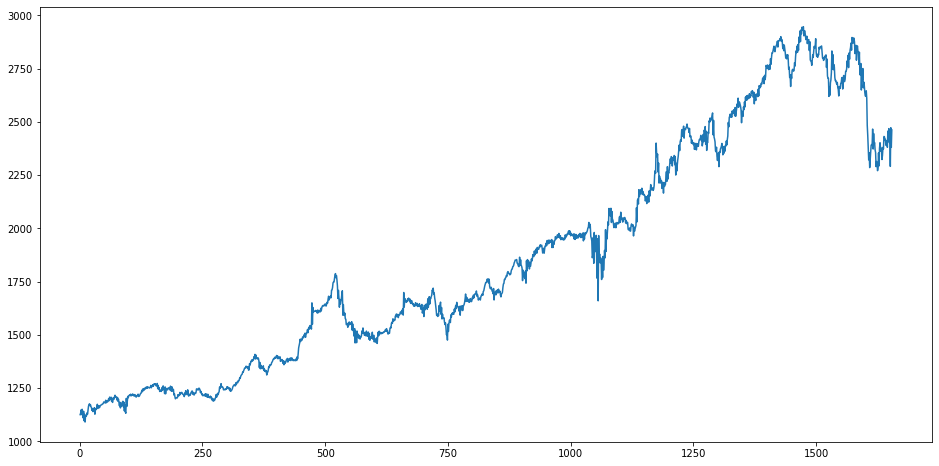

In [13]:
plt.figure(figsize =(16,8))
cum_sum = pd.Series(m.fittedvalues, copy = True).cumsum() + df_train['Close'][0]
diff_pred = pd.Series(df_train_diff)
diff_pred = diff_pred.add(cum_sum, fill_value=1)
diff_pred.plot()

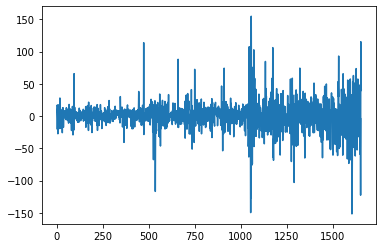

In [14]:
plt.plot(df_train_diff)

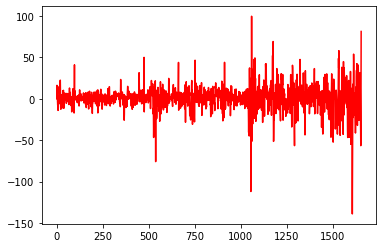

In [15]:
plt.plot(m.fittedvalues, color = 'red')

In [16]:
M1 =  ARIMA(df_train['Close'], order = (1,1,1) ).fit()

In [17]:
M2 =  ARIMA(df_train['Close'], order = (1,1,0) ).fit()

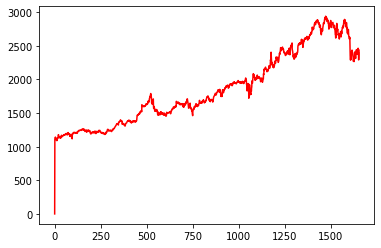

In [18]:
plt.plot(M1.fittedvalues, color = 'red')

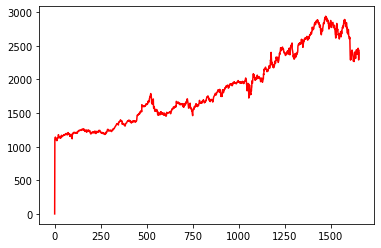

In [19]:
plt.plot(M2.fittedvalues, color = 'red')

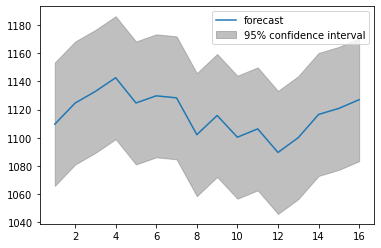

In [20]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(M1, 1, 16)
plt.show()

In [21]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.0 MB/s eta 0:00:00


In [22]:
import pmdarima as pm

In [23]:
A = pm.auto_arima(df_train['Close'], start_p=0, start_q=0, d=1, max_p = 3, max_q = 3, seasonal = True, trace = True)
A.fit(df_train['Close'])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14976.354, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14968.164, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14968.731, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14976.607, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14968.854, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14968.770, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14970.681, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14968.782, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.739 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [24]:
forecast=A.predict(n_periods = 35)

In [25]:
df_final=pd.DataFrame({'Date': [x for x in df_test['Date']],'Predictions': forecast})
df_final

,Date,Predictions
1655,2022-08-01,2472.669505
1656,2022-08-02,2473.725817
1657,2022-08-03,2474.522055
1658,2022-08-04,2475.338686
1659,2022-08-05,2476.153719
1660,2022-08-08,2476.968876
1661,2022-08-09,2477.784024
1662,2022-08-10,2478.599172
1663,2022-08-11,2479.414321
1664,2022-08-12,2480.229469
